LEVEL-1 :
Task-1: Data Exploration and Preprocessing
***. Explore the dataset and identify the number
of rows and columns.

In [19]:
import pandas as pd

file_path = 'Dataset .csv'
df = pd.read_csv(file_path)

rows, cols = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 9551
Number of columns: 21


***. Check for missing values in each column and
handle them accordingly.

In [20]:
import seaborn as sns

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Example: Convert 'Aggregate rating' to numeric (if it's not already)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


***. Perform data type conversion if necessary.
Analyze the distribution of the target variable
("Aggregate rating") and identify any class
imbalances.

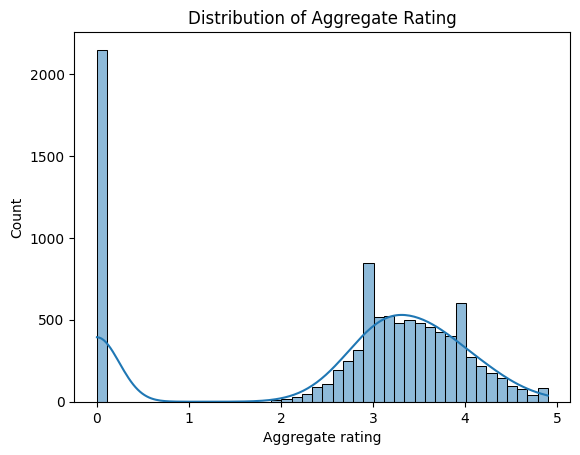

Class distribution in 'Aggregate rating':
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [21]:

import matplotlib.pyplot as plt

sns.histplot(df['Aggregate rating'], kde=True)
plt.title('Distribution of Aggregate Rating')
plt.show()

rating_counts = df['Aggregate rating'].value_counts()
print("Class distribution in 'Aggregate rating':")
print(rating_counts)

LEVEL-1 :
Task-2 : Descriptive Analysis
***. Calculate basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.

In [22]:
statistics = df.describe()
print("Basic statistical measures:")
print(statistics)

Basic statistical measures:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250

***. Explore the distribution of categorical variables like "Country Code," "City," and "Cuisines."

In [23]:
categorical_columns = ['Country Code', 'City', 'Cuisines']
for col in categorical_columns:
    print(f"Distribution of {col}:")
    print(df[col].value_counts())

Distribution of Country Code:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64
Distribution of City:
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
Distribution of Cuisines:
Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, 

***. Identify the top cuisines and cities with the highest number of restaurants.


In [24]:
top_cuisines = df['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines:")
print(top_cuisines)

top_cities = df['City'].value_counts().head(10)
print("Top 10 Cities:")
print(top_cities)

Top 10 Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64
Top 10 Cities:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


LEVE-1 :
Task-3: Geospatial Analysis

***. Visualize the locations of restaurants on a
map using latitude and longitude
information.

In [25]:
import folium

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(restaurant_map)

restaurant_map.save("restaurant_map.html")

***. Analyze the distribution of restaurants
across different cities or countries.

In [26]:

city_distribution = df['City'].value_counts()
country_distribution = df['Country Code'].value_counts()

print("Distribution of restaurants across cities:")
print(city_distribution)

print("Distribution of restaurants across countries:")
print(country_distribution)

Distribution of restaurants across cities:
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
Distribution of restaurants across countries:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


***. Determine if there is any correlation
between the restaurant's location and its
rating.

In [28]:
location_rating_corr = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation between location and rating:")
print(location_rating_corr)

Correlation between location and rating:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000
